<h1 align="center"> Zuber Insights: Travel Patterns and External Factors Analysis</h1>

## Descripción del Proyecto

Zuber es una nueva empresa de viajes compartidos que se está lanzando en Chicago. El objetivo del proyecto es identificar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de factores externos en los viajes.

Al trabajar con una base de datos, se analizarán los datos de los competidores y se pondrá a prueba una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Etapas

**Paso 1: Análisis Exploratorio de Datos**

Los conjuntos de datos se encuentran en los siguientes directorios:
- `./datasets/taxi_rides.csv`, que contiene:
    - `company_name`: Nombre de la empresa de taxis.
    - `trips_amount`: Número de viajes realizados por cada empresa de taxis el 15 y 16 de noviembre de 2017.

- `./datasets/completed_trips.csv`, que contiene:
    - `dropoff_location_name`: Barrios de Chicago donde finalizaron los viajes.
    - `average_trips`: Promedio de viajes que terminaron en cada barrio en noviembre de 2017.

*Tareas a realizar:*
- Importar los archivos.
- Analizar los datos contenidos en los archivos.
- Verificar que los tipos de datos sean correctos.
- Identificar los 10 principales barrios en términos de finalización de viajes.
- Realizar gráficos sobre el número de viajes por empresa de taxis y los 10 principales barrios por número de finalizaciones.
- Extraer conclusiones basadas en cada gráfico y explicar los resultados.

**Paso 2: Prueba de Hipótesis**

El conjunto de datos se encuentra en el siguiente directorio:

- `./datasets/loop_trips_to_airport.csv`, que contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Los datos incluyen:
    - `start_ts`: Fecha y hora de recogida.
    - `weather_conditions`: Condiciones climáticas al inicio del viaje.
    - `duration_seconds`: Duración del viaje en segundos.

*Prueba de hipótesis:*
- Evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía los sábados lluviosos.


# Contenido <a id='back'></a>

* [Análisis exploratorio de datos](#data_review)
    * [Identificar los 10 principales barrios en términos de finalización](#top_neighborhoods)
    * [Gráfica de los 10 barrios principales por número de finalizaciones](#img_top_neighborhoods)
    * [Gráfica de las empresas de taxis y número de viajes](#top_taxis)
* [Prueba de Hipótesis](#hypothesis)
* [Conclusión](#end)

<h2 align="center">Análisis exploratorio de datos</h2> <a id="data_review"></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Acceso a los registros de los recursos "taxi rides" y "completed trips"

df_taxi_rides = pd.read_csv('./datasets/taxi_rides.csv')

df_completed_trips = pd.read_csv('./datasets/completed_trips.csv')

In [3]:
# Obtener información general sobre los registros del DataFrame 'taxi rides'

print("\033[1m Muestra aleatoria de filas del DataFrame 'taxi rides':")

display(df_taxi_rides.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'taxi rides':\033[0m \n")

df_taxi_rides.info()

 Muestra aleatoria de filas del DataFrame 'taxi rides':


,company_name,trips_amount
43,2809 - 95474 C & D Cab Co Inc.,29
32,Leonard Cab Co,147
39,0118 - 42111 Godfrey S.Awir,33
49,5074 - 54002 Ahzmi Inc,16
3,Yellow Cab,9888
54,2192 - 73487 Zeymane Corp,14
21,American United,1404
1,Taxi Affiliation Services,11422
51,4623 - 27290 Jay Kim,15
20,Checker Taxi,1486


 Resumen del DataFrame 'taxi rides': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Obtener información general sobre los registros del DataFrame 'completed trips'

print("\033[1m Muestra aleatoria de filas del DataFrame 'completed trips':")

display(df_completed_trips.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'completed trips':\033[0m \n")

df_completed_trips.info()

 Muestra aleatoria de filas del DataFrame 'completed trips':


,dropoff_location_name,average_trips
34,Humboldt Park,97.866667
28,Wicker Park,182.600000
40,Bucktown,74.300000
8,Gold Coast,1364.233333
71,Edison Park,14.166667
11,East Village,1212.066667
7,Museum Campus,1510.000000
43,Mckinley Park,64.033333
86,West Elsdon,5.666667
35,Norwood Park,95.233333


 Resumen del DataFrame 'completed trips': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
print("Registros duplicados en df_taxi_rides: ",  df_taxi_rides.duplicated().sum())
print("Registros duplicados en df_completed_trips: ",  df_completed_trips.duplicated().sum())

Registros duplicados en df_taxi_rides:  0
Registros duplicados en df_completed_trips:  0


In [6]:
# Estadísticas descriptivas del df_taxi_rides
df_taxi_rides.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
# Estadísticas descriptivas del df_completed_trips
df_completed_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


**Análisis inicial del df_taxi_rides**

Las estadísticas descriptivas para la columna 'trips_amount' muestran que hay un total de 64 registros en el conjunto de datos. La cantidad promedio de viajes realizados por cada compañía de taxis es de aproximadamente 2145.48, con una desviación estándar de alrededor de 3812.31, lo que indica una variabilidad considerable en los datos. La mediana, es de 178.5, lo que significa que al menos la mitad de las compañías tienen una cantidad de viajes igual o menor a este valor. No se detectaron errores en sus tipos de datos, registros duplicados ni valores ausentes.

**Análisis inicial del df_completed_trips**

Las estadísticas descriptivas para la columna 'average_trips' muestran que hay un total de 94 registros en el conjunto de datos. La cantidad promedio de viajes terminados en cada barrio es de aproximadamente 599.95, con una desviación estándar de alrededor de 1714.59, lo que indica una variabilidad considerable en los datos. El percentil 50 (mediana) muestra que aproximadamente el 50% de los barrios tienen una cantidad de viajes promedio de alrededor de 52.02 o menos, mientras que el percentil 75 indica que el 75% de los barrios tienen una cantidad de viajes promedio de 298.86 o menos. No se detectaronerrores en sus tipos de datos, registros duplicados ni valores ausentes.

[Volver a Contenidos](#back)

**Identificar los 10 principales barrios en términos de finalización** <a id="top_neighborhoods"></a>

In [8]:
df_completed_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


[Volver a Contenidos](#back)

**Gráfica de los 10 barrios principales por número de finalizaciones** <a id="img_top_neighborhoods"></a>

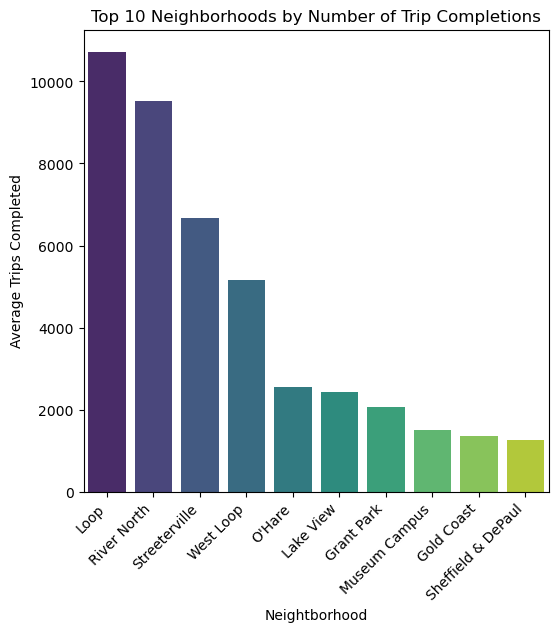

In [9]:
plt.figure(figsize=(6,6))

sns.barplot(data=df_completed_trips.head(10), 
    x='dropoff_location_name', y='average_trips', hue='dropoff_location_name', 
    palette='viridis', legend=False)

plt.title('Top 10 Neighborhoods by Number of Trip Completions')
plt.xlabel('Neightborhood')
plt.ylabel('Average Trips Completed')
plt.xticks(rotation=45, ha='right')

plt.show()

**Interpretación**
- **Loop:** Este barrio lidera con más de 10 000 viajes completados, lo que indica que es un centro de actividad significativo, posiblemente debido a la presencia de negocios, atracciones turísticas o una densidad de población alta.
- **River North y Streeterville:** Siguen al Loop con menos viajes completados, pero aún así representan una cantidad considerable. Esto podría reflejar áreas con buena demanda de servicios de taxi debido a la vida nocturna, hoteles o eventos.
- **Gold Coast y Sheffield & DePaul:** Estos barrios, aunque están entre los 10 principales, tienen el menor número de viajes completados, lo que podría indicar una menor demanda o competencia con otros modos de transporte.

[Volver a Contenidos](#back)

**Gráfica de las empresas de taxis y número de viajes** <a id="top_taxis"></a>

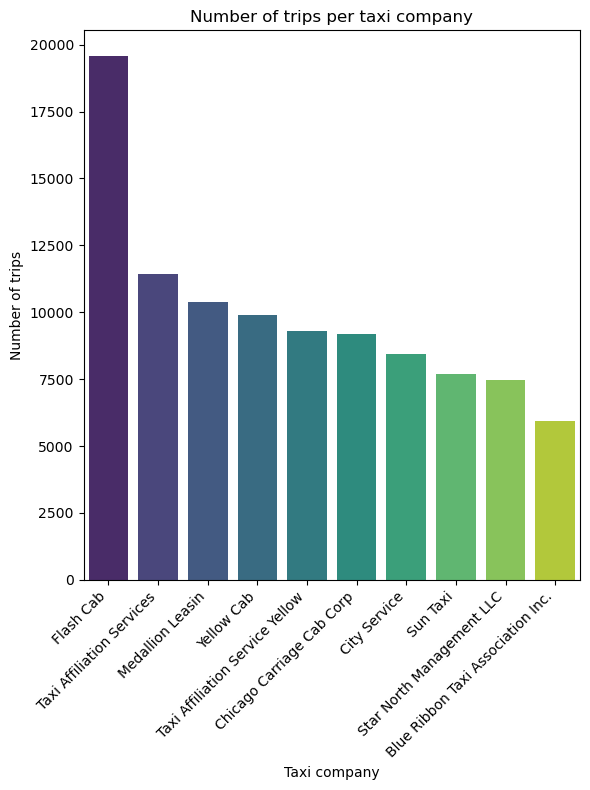

In [10]:
plt.figure(figsize=(6,8))

sns.barplot(data=df_taxi_rides.head(10), x='company_name', y='trips_amount', hue='company_name', palette='viridis', legend=False)

plt.title('Number of trips per taxi company')
plt.xlabel('Taxi company')
plt.ylabel('Number of trips')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

**Interpretación**
- **Flash Cab:** Lidera con la mayor cantidad de viajes, lo que podría indicar una fuerte preferencia de los pasajeros o una mayor disponibilidad de vehículos. Es importante considerar si Flash Cab tiene una estrategia de marketing más efectiva o una mejor cobertura de servicio en Chicago.
- **Taxi Affiliation Services Yellow Cab y Medallion Leasing:** Siguen a Flash Cab en número de viajes. Sería útil analizar si ofrecen servicios especiales o tarifas competitivas que atraigan a los pasajeros.


[Volver a Contenidos](#back)


<h2 align="center">Prueba de hipótesis (Python)</h5> <a id="hypothesis"></a>

In [11]:
# Acceso a los registros del recurso "loop trips to the airport"

df_loop_trips_to_airport = pd.read_csv('./datasets/loop_trips_to_airport.csv')

In [12]:
# Obtener información general sobre los registros del DataFrame "loop trips to the airport"

print("\033[1m Muestra aleatoria de filas del DataFrame 'loop trips to the airport':")

display(df_loop_trips_to_airport.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'loop trips to the airport':\033[0m \n")

df_loop_trips_to_airport.info()

 Muestra aleatoria de filas del DataFrame 'loop trips to the airport':


,start_ts,weather_conditions,duration_seconds
432,2017-11-11 07:00:00,Good,1419.0
467,2017-11-25 07:00:00,Good,1409.0
558,2017-11-04 06:00:00,Good,1351.0
487,2017-11-18 10:00:00,Bad,1680.0
701,2017-11-11 14:00:00,Good,2460.0
539,2017-11-04 12:00:00,Good,2700.0
662,2017-11-11 12:00:00,Good,1933.0
922,2017-11-18 08:00:00,Bad,1495.0
191,2017-11-04 12:00:00,Good,2160.0
47,2017-11-18 06:00:00,Good,1742.0


 Resumen del DataFrame 'loop trips to the airport': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Prueba de Hipótesis:** 

Se pretende investigar si hay un cambio en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare durante los sábados lluviosos.

- *Hipótesis Nula (H0):* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare permanece constante los sábados lluviosos.

- *Hipótesis Alternativa (H1):*  La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía en los sábados lluviosos.

- *Estadístico de prueba:* Se empleará una prueba t de dos muestras para evaluar si hay una diferencia significativa entre la duración promedio de los viajes durante los sábados con y sin lluvia.

- *Valor Alfa (α):* Se establece un valor de 0.05 para la significancia estadística.

In [13]:
# Segmentar datos según las condiciones climáticas
saturday_without_rain = df_loop_trips_to_airport[df_loop_trips_to_airport['weather_conditions']=='Good']['duration_seconds']
saturday_with_rain = df_loop_trips_to_airport[df_loop_trips_to_airport['weather_conditions']!='Good']['duration_seconds']

# Conteo de datos de los grupos segmentados
print('Número de datos en var_saturday_without_rain=', len(saturday_without_rain))
print('Número de datos en saturday_with_rain=', len(saturday_with_rain))
print('---------------------------------------------------')

# Estudio de igualdad de varianzas
var_saturday_without_rain = saturday_without_rain.var()
var_saturday_with_rain = saturday_with_rain.var()

print('Varianza de saturday_without_rain=', var_saturday_without_rain)
print('Varianza de saturday_with_rain=', var_saturday_with_rain)
print('---------------------------------------------------')

if var_saturday_without_rain > var_saturday_with_rain:
    print("La varianza de los sábados sin lluvia es mayor que la varianza de los sábados con lluvia.")
elif var_saturday_without_rain < var_saturday_with_rain:
    print("La varianza de los sábados con lluvia es mayor que la varianza de los sábados sin lluvia.")
else:
    print("Las varianzas de los dos grupos son aproximadamente iguales.")


Número de datos en var_saturday_without_rain= 888
Número de datos en saturday_with_rain= 180
---------------------------------------------------
Varianza de saturday_without_rain= 576382.0096895089
Varianza de saturday_with_rain= 520294.08600248274
---------------------------------------------------
La varianza de los sábados sin lluvia es mayor que la varianza de los sábados con lluvia.


**Prueba de Hipótesis:** 

**Estadístico de prueba:** Se empleará una prueba t de Welch para evaluar si existe una diferencia significativa entre la duración promedio de los viajes durante los sábados con y sin lluvia. La elección de esta prueba se debe a la diferencia significativa en las varianzas de los dos grupos. La prueba t de Welch es una versión modificada de la prueba t de Student que no asume igualdad de varianzas entre los grupos, lo que la hace más apropiada en este contexto.

In [14]:
alpha = 0.05

results, p_value = st.ttest_ind(saturday_without_rain, saturday_with_rain, equal_var=False)

print('Valor p:', p_value)

if p_value < alpha:
    print('Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O\'Hare varía en los sábados lluviosos.')
else:
    print('No podemos rechazar la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O\'Hare permanece constante los sábados lluviosos.')


Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía en los sábados lluviosos.


**Análisis:** Los resultados de la prueba de hipótesis sobre la diferencia en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, utilizando el estadístico T de Student, arrojaron un valor p de 6.73e-12. Este valor es menor que el nivel de significancia de 0.05, lo que indica que podemos rechazar la hipótesis nula. Por lo tanto, hay evidencia suficiente para concluir que existe una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

Es evidente que las condiciones climáticas adversas, particularmente la lluvia, influyen de manera notable en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Es probable que la congestión del tráfico y otros factores relacionados con las condiciones climáticas incidan en este cambio en la duración promedio de los viajes.

[Volver a Contenidos](#back)

## Conclusión <a id='end'></a>

El análisis exploratorio de datos realizado sobre los viajes de Zuber en Chicago ha proporcionado información valiosa sobre las dinámicas de la ciudad y el comportamiento de los pasajeros. Los resultados indican que el barrio del Loop es un centro neurálgico de actividad, liderando en número de finalizaciones de viajes, seguido por otros barrios clave como River North y Streeterville, que también muestran una alta demanda de servicios de taxi. La menor cantidad de viajes completados en barrios como Gold Coast y Sheffield & DePaul sugiere que en estas zonas podría haber una menor demanda o que los pasajeros optan por otros modos de transporte.

En cuanto a las empresas de taxis, Flash Cab destaca como la preferida por los pasajeros, lo que podría deberse a una mayor disponibilidad de vehículos o una estrategia de marketing más efectiva. Taxi Affiliation Services Yellow Cab y Medallion Leasing, aunque también tienen una presencia significativa, podrían beneficiarse de un análisis más profundo para identificar posibles mejoras en sus servicios o estrategias de mercado.

Finalmente, la prueba de hipótesis sobre la influencia de las condiciones climáticas en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare ha demostrado que la lluvia impacta significativamente en la duración de estos trayectos. Esto subraya la importancia de considerar factores externos como el clima al planificar y gestionar operaciones de transporte.

En conjunto, este análisis proporciona una base sólida para tomar decisiones estratégicas en Zuber, orientadas a optimizar el servicio en áreas de alta demanda y ajustar la operación en función de las condiciones climáticas para mejorar la experiencia del cliente.

[Volver a Contenidos](#back)